In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

In [5]:
train_data.shape
# 60,000 black and white images and all are 28*28 pixels

(60000, 28, 28)

In [6]:
test_data.shape

(10000, 28, 28)

In [7]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#first image
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

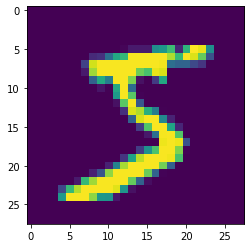

In [9]:
plt.imshow(train_data[0])
plt.show()

In [10]:
# reshape data
x_train=train_data.reshape(60000,28,28,1)
x_test=test_data.reshape(test_data.shape[0],28,28,1)

In [11]:
print(train_data.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [12]:
#scale the data
x_train=x_train/255
x_test=x_test/255

In [13]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
#one hot encoding
y_train=pd.get_dummies(train_label)
y_test=pd.get_dummies(test_label)

In [15]:
y_train.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [16]:
# build the model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
import livelossplot
from livelossplot import PlotLossesKerasTF

In [17]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(5,5),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [19]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

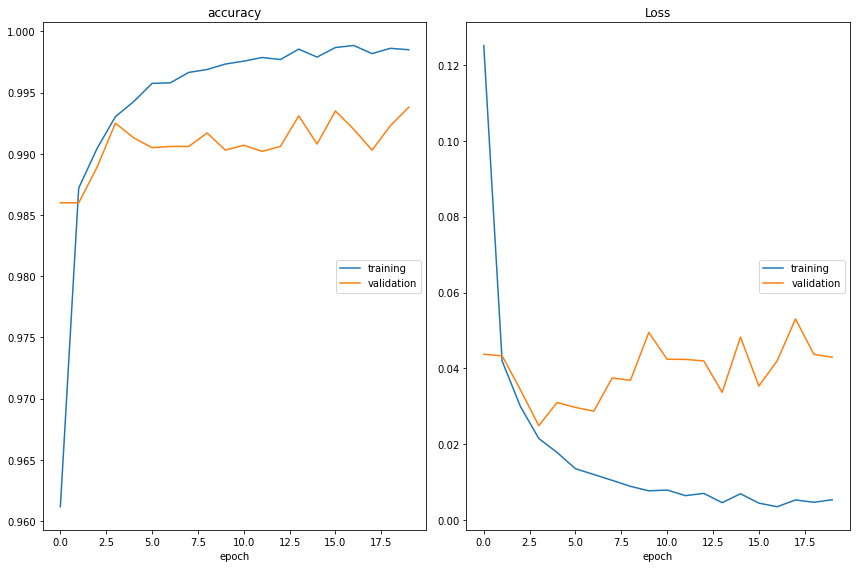

accuracy
	training         	 (min:    0.961, max:    0.999, cur:    0.998)
	validation       	 (min:    0.986, max:    0.994, cur:    0.994)
Loss
	training         	 (min:    0.004, max:    0.125, cur:    0.005)
	validation       	 (min:    0.025, max:    0.053, cur:    0.043)
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0429 - val_accuracy: 0.9938


In [20]:
#train model
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),callbacks=[PlotLossesKerasTF()])

Accuracy of our model is 99. %

In [21]:
y_test_pred=model.predict(x_test).argmax(axis=1)

In [22]:
pd.crosstab(test_label,y_test_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,978,0,0,0,0,0,0,0,1,1
1,0,1131,1,0,0,1,0,0,1,1
2,0,0,1027,0,0,0,0,5,0,0
3,0,0,2,1007,0,1,0,0,0,0
4,0,0,0,0,979,0,0,0,0,3
5,1,0,0,4,0,885,1,0,1,0
6,4,1,0,0,1,2,949,0,1,0
7,0,2,4,0,2,0,0,1016,0,4
8,2,0,1,0,0,0,0,0,970,1


In [23]:
#save the model
model.save("mnistModel.h5")

In [24]:
#load the model
from tensorflow.keras.models import load_model
mnModel=load_model("mnistModel.h5");

In [25]:
mnModel.predict(x_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)